**Dealing with Data**

In [1]:
# ----------------------------------------------------
# Dealing with Data
# Objective: Work with libraries like NumPy, Pandas, and Statistics
# Task: Analyze and manipulate datasets effectively
# ----------------------------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting (for Jupyter Notebooks)
%matplotlib inline


1. Loading Dataset

In [2]:
# Example: Load a dataset (replace with your dataset file path or use built-in ones)
# For demo, we'll use Seaborn's built-in dataset "tips"
df = sns.load_dataset("tips")

# Display first 5 rows
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Exploring the DataSet

In [3]:
# Basic info
df.info()

# Statistical summary
df.describe()

# Shape of dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Checking missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
Shape: (244, 7)
Columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


3. Working with NumPy

In [4]:
# Converting a column to NumPy array
total_bill_array = df['total_bill'].to_numpy()

# Basic NumPy operations
print("Mean:", np.mean(total_bill_array))
print("Median:", np.median(total_bill_array))
print("Standard Deviation:", np.std(total_bill_array))

# Reshape example (creating 2D array from 1D)
reshaped_array = total_bill_array[:10].reshape(5,2)
print("Reshaped Array:\n", reshaped_array)


Mean: 19.78594262295082
Median: 17.795
Standard Deviation: 8.884150577771132
Reshaped Array:
 [[16.99 10.34]
 [21.01 23.68]
 [24.59 25.29]
 [ 8.77 26.88]
 [15.04 14.78]]


4. Using Statistics Library

In [5]:
# Example: statistics module
print("Mode of tips:", stats.mode(df['tip']))
print("Variance of total bill:", stats.variance(df['total_bill']))


Mode of tips: 2.0
Variance of total bill: 79.25293861397827


5. Pandas Operations

In [ ]:
# Selecting specific columns
df[['total_bill', 'tip']].head()

# Filtering rows
df[df['total_bill'] > 30]

# Grouping
df.groupby('day')['total_bill'].mean()

# Sorting
df.sort_values(by='total_bill', ascending=False).head()


6. Data Visualization with Matplotlib & Seaborn

*Histogram*

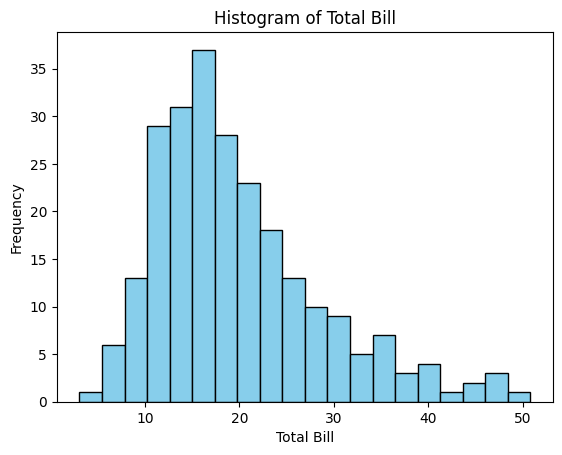

In [6]:
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()


*Boxplot*

/tmp/ipython-input-3281591823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['day'], y=df['total_bill'], palette="coolwarm")


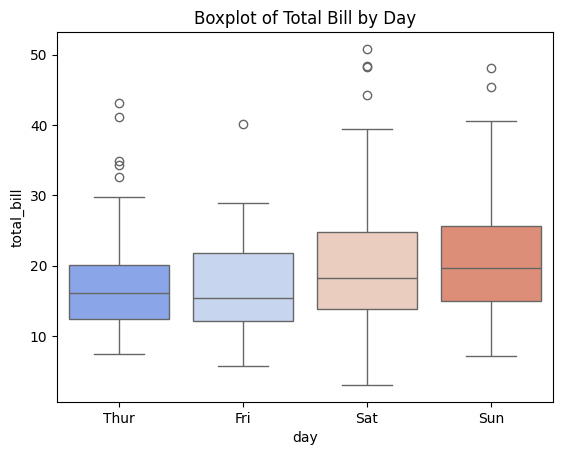

In [7]:
sns.boxplot(x=df['day'], y=df['total_bill'], palette="coolwarm")
plt.title("Boxplot of Total Bill by Day")
plt.show()

*Scatter Plot*

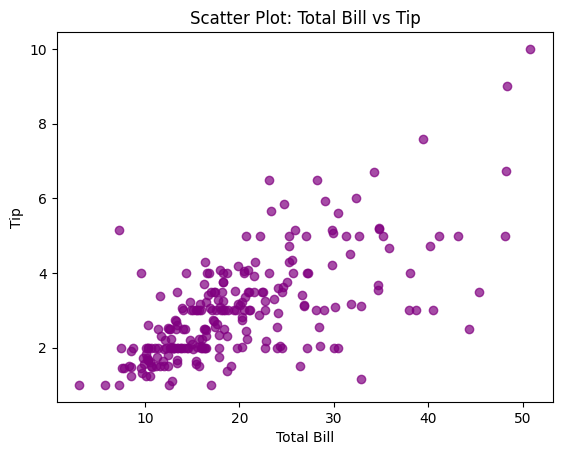

In [8]:
plt.scatter(df['total_bill'], df['tip'], alpha=0.7, color="purple")
plt.title("Scatter Plot: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


*Pairplot*

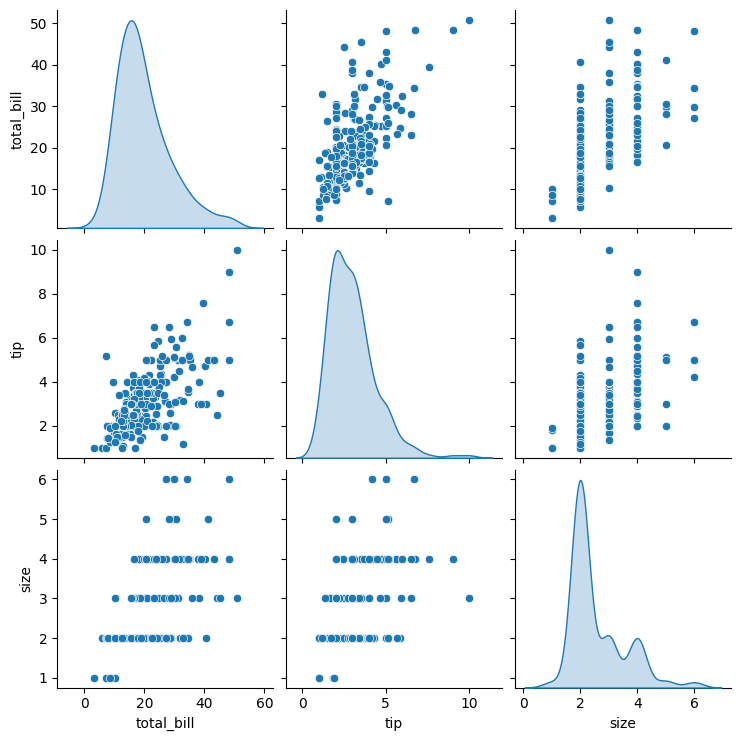

In [9]:
sns.pairplot(df[['total_bill', 'tip', 'size']], diag_kind="kde")
plt.show()


*Heatmap (Correlation)*

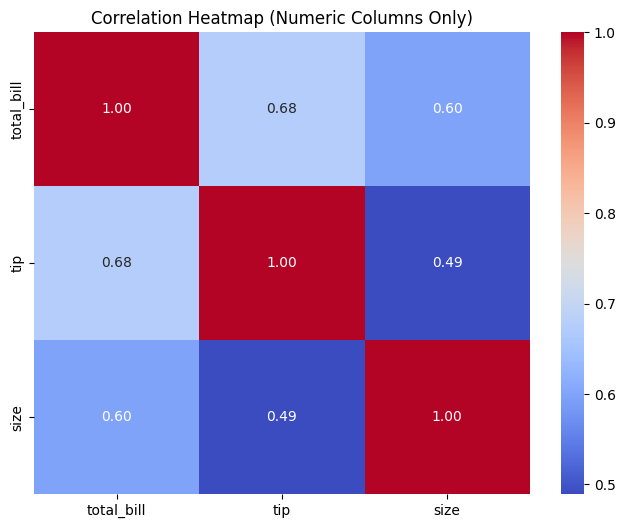

In [12]:
plt.figure(figsize=(8,6))

# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


7. Handeling Missing Values

In [13]:
# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)


8. Feature Engineering Basics

In [14]:
# Creating new column
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100

# Binning continuous values
df['bill_range'] = pd.cut(df['total_bill'], bins=[0,10,20,40,60], labels=['Low','Medium','High','Very High'])

df.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percent,bill_range
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,Medium
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,Medium
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,High
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,High
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,High
